In [22]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

In [23]:
df_CAN = df[df['job_country'] == 'Canada'].copy()

df_CAN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,"['python', 'sql', 'pytorch', 'pandas']","{'libraries': ['pytorch', 'pandas'], 'programm..."
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'kubernetes']","{'libraries': ['hadoop'], 'other': ['kubernete..."
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None
85,Machine Learning Engineer,Machine Learning Engineer/Scientist High Perfo...,Anywhere,via LinkedIn,Full-time,True,Canada,2023-11-21 13:13:33,False,False,Canada,None,NaN,NaN,Haiper,"['python', 'pytorch']","{'libraries': ['pytorch'], 'programming': ['py..."
98,Senior Data Engineer,Senior Data Engineer (AWS),"Toronto, ON, Canada",via SmartRecruiters Job Search,Full-time,False,Canada,2023-09-01 13:42:05,True,False,Canada,None,NaN,NaN,MUFG Investor Services,"['python', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785317,Data Engineer,"Data Engineer, Finance Data","Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-21 06:59:35,False,False,Canada,None,NaN,NaN,OMERS,"['sql', 'python', 'sql server', 'snowflake', '...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [..."
785327,Data Engineer,Azure Data Engineer,"Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-25 06:18:35,False,False,Canada,None,NaN,NaN,Tiger Analytics,"['sql', 'azure']","{'cloud': ['azure'], 'programming': ['sql']}"
785339,Data Engineer,Data Engineering Consultant,"Montreal, QC, Canada",via BeBee Canada,Full-time,False,Canada,2023-04-11 06:11:34,True,False,Canada,None,NaN,NaN,CGI,"['sql', 'python', 'sql server', 'mysql', 'post...","{'analyst_tools': ['tableau', 'power bi', 'loo..."
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,"['sql', 'nosql', 'python', 'java', 'cassandra'...","{'cloud': ['azure', 'snowflake', 'databricks',..."


In [24]:
df_CAN['job_posted_month'] = df_CAN['job_posted_date'].dt.strftime('%B')

df_CAN

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills,job_posted_month
50,Machine Learning Engineer,Sr ML Engineer - Research & NLP (Remote),"Toronto, ON, Canada",via Careers At BenchSci,Full-time,False,Canada,2023-08-24 13:40:48,False,False,Canada,None,NaN,NaN,BenchSci,"['python', 'sql', 'pytorch', 'pandas']","{'libraries': ['pytorch', 'pandas'], 'programm...",August
59,Data Engineer,Data Engineer with Dremio Experience,"Toronto, ON, Canada",via LinkedIn,Contractor,False,Canada,2023-08-28 13:35:13,True,False,Canada,None,NaN,NaN,Iris Software Inc.,"['sql', 'hadoop', 'kubernetes']","{'libraries': ['hadoop'], 'other': ['kubernete...",August
81,Data Analyst,Business Data Analyst,"Regina, SK, Canada",via ZipRecruiter,Full-time,False,Canada,2023-03-01 13:28:04,False,False,Canada,None,NaN,NaN,027 Parks Culture and Sport,None,None,March
85,Machine Learning Engineer,Machine Learning Engineer/Scientist High Perfo...,Anywhere,via LinkedIn,Full-time,True,Canada,2023-11-21 13:13:33,False,False,Canada,None,NaN,NaN,Haiper,"['python', 'pytorch']","{'libraries': ['pytorch'], 'programming': ['py...",November
98,Senior Data Engineer,Senior Data Engineer (AWS),"Toronto, ON, Canada",via SmartRecruiters Job Search,Full-time,False,Canada,2023-09-01 13:42:05,True,False,Canada,None,NaN,NaN,MUFG Investor Services,"['python', 'aws', 'databricks', 'spark']","{'cloud': ['aws', 'databricks'], 'libraries': ...",September
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785317,Data Engineer,"Data Engineer, Finance Data","Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-21 06:59:35,False,False,Canada,None,NaN,NaN,OMERS,"['sql', 'python', 'sql server', 'snowflake', '...","{'analyst_tools': ['ssrs', 'ssis'], 'cloud': [...",January
785327,Data Engineer,Azure Data Engineer,"Toronto, ON, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-25 06:18:35,False,False,Canada,None,NaN,NaN,Tiger Analytics,"['sql', 'azure']","{'cloud': ['azure'], 'programming': ['sql']}",January
785339,Data Engineer,Data Engineering Consultant,"Montreal, QC, Canada",via BeBee Canada,Full-time,False,Canada,2023-04-11 06:11:34,True,False,Canada,None,NaN,NaN,CGI,"['sql', 'python', 'sql server', 'mysql', 'post...","{'analyst_tools': ['tableau', 'power bi', 'loo...",April
785511,Data Engineer,Data Engineer,"Montreal, QC, Canada",via Trabajo.org,Full-time,False,Canada,2023-01-18 06:17:13,False,False,Canada,None,NaN,NaN,CGI,"['sql', 'nosql', 'python', 'java', 'cassandra'...","{'cloud': ['azure', 'snowflake', 'databricks',...",January


In [25]:
df_CAN_pivot = df_CAN.pivot_table(index='job_posted_month',columns='job_title_short', aggfunc='size')

In [26]:
df_CAN_pivot.reset_index(inplace=True)
df_CAN_pivot['month_no'] = pd.to_datetime(df_CAN_pivot['job_posted_month'],format='%B').dt.month

df_CAN_pivot.sort_values('month_no', inplace=True)
df_CAN_pivot.set_index('job_posted_month', inplace=True)
df_CAN_pivot.drop(columns = 'month_no', inplace=True)
# Click run all to avoid creating mutliple index columns

In [27]:
df_CAN_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,136,26,286,945,257,55,68,251,83,118
February,72,24,148,506,133,34,28,170,45,106
March,75,26,155,533,138,68,32,163,60,105
April,138,30,179,513,167,53,30,173,45,127
May,61,9,160,549,108,42,24,148,35,65
June,89,10,183,491,116,44,28,168,45,66
July,92,25,208,501,169,43,45,153,58,75
August,118,24,183,374,164,58,56,124,66,116
September,82,15,209,304,131,39,38,101,35,94


<Axes: xlabel='job_posted_month'>

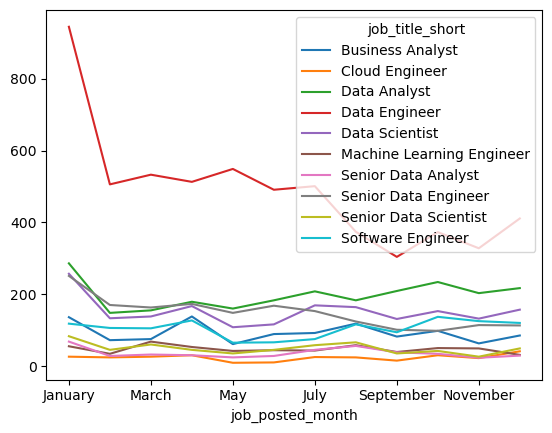

In [28]:
df_CAN_pivot.plot(kind='line')

In [31]:
top_3 = df_CAN['job_title_short'].value_counts().head(3)
top_3 = top_3.index.tolist()

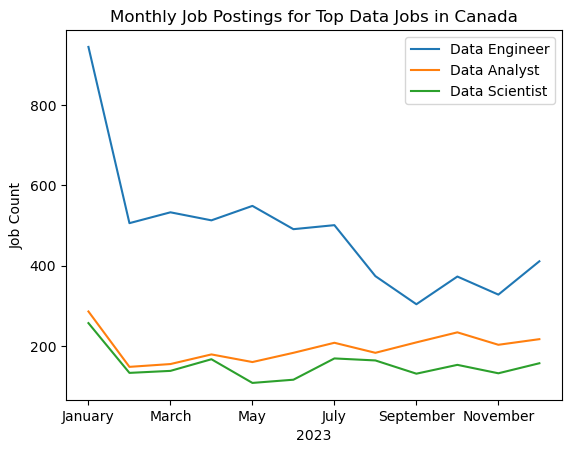

In [33]:
df_CAN_pivot[top_3].plot(kind='line')
plt.title('Monthly Job Postings for Top Data Jobs in Canada')
plt.xlabel('2023')
plt.ylabel('Job Count')
plt.legend()
plt.show()